In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/startup-success-prediction/startup data.csv


In [2]:
df = pd.read_csv("/kaggle/input/startup-success-prediction/startup data.csv")[:50]

In [3]:
df

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,...,c:22898,0,0,0,1,0,0,3.0000,1,closed
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,...,c:16191,1,0,1,1,0,0,1.6667,1,acquired
7,875,CA,38.057107,-122.513742,94901,c:5192,San Rafael,NaN,ClairMail,1,...,c:5192,0,0,1,1,0,1,3.5000,1,acquired
8,16,MA,42.712207,-73.203599,1267,c:1043,Williamstown,Williamstown MA 1267,VoodooVox,1,...,c:1043,1,0,1,0,0,1,4.0000,1,acquired
9,846,CA,37.427235,-122.145783,94306,c:498,Palo Alto,NaN,Doostang,1,...,c:498,1,1,1,0,0,0,1.0000,1,acquired


In [4]:
#df = df.drop(['id'],axis=1)
df = df.drop(['Unnamed: 6'],axis=1)
df = df.drop(['category_code'],axis=1)
df = df.drop(['object_id'],axis=1)
df = df.drop(['zip_code'],axis=1)
df = df.drop(['founded_at'],axis=1)
df = df.drop(['closed_at'],axis=1)
df = df.drop(['first_funding_at'],axis=1)
df = df.drop(['last_funding_at'],axis=1)
df = df.drop(['city'],axis=1)
df = df.drop(['Unnamed: 0'],axis=1)
df = df.drop(['latitude','longitude'],axis=1)
df = df.drop(['relationships'],axis=1)
df = df.drop(['state_code.1'], axis=1)

In [6]:
df['status'] = df.status.map({'acquired':1, 'closed':0})

In [6]:
from sklearn.preprocessing import LabelEncoder

# Инициализация LabelEncoder для кодирования категориальных данных в числовые значения
label_encoder = LabelEncoder()

# Применение LabelEncoder к столбцу state_code.1
df['state_code_encoded'] = label_encoder.fit_transform(df['state_code'])

In [8]:
# Убираем старый столбец state_code с текстовыми значениями
df = df.drop(['state_code'], axis=1)

KeyError: "['state_code'] not found in axis"

In [9]:
import networkx as nx
from tqdm import tqdm # предоставляет красивые прогресс-бары для циклов, что помогает отслеживать выполнение кода

# Создание графа
G = nx.Graph()

# Добавление узлов для каждого стартапа
for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Adding nodes"):
    G.add_node(row['name'], label=row['name'])

# Добавление ребер на основе общих инвесторов
investor_columns = ['has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']
for col in tqdm(investor_columns, desc="Processing investor columns"):
    for i, startup1 in enumerate(tqdm(df['name'], desc="Outer loop", leave=False)):
        for j, startup2 in enumerate(tqdm(df['name'], desc="Inner loop", leave=False)):
            if i < j and df.iloc[i][col] == 1 and df.iloc[j][col] == 1:
                G.add_edge(startup1, startup2)

Outer loop:   0%|          | 0/50 [00:00<?, ?it/s]

Inner loop:   0%|          | 0/50 [00:00<?, ?it/s]

                                                  

Inner loop:   0%|          | 0/50 [00:00<?, ?it/s]

                                                  

Inner loop:   0%|          | 0/50 [00:00<?, ?it/s]

                                                  

Inner loop:   0%|          | 0/50 [00:00<?, ?it/s]

                                                  

Inner loop:   0%|          | 0/50 [00:00<?, ?it/s]

                                                  

Inner loop:   0%|          | 0/50 [00:00<?, ?it/s]

                                                  
Outer loop:  12%|█▏        | 6/50 [00:00<00:00, 58.96it/s]

Inner loop:   0%|          | 0/50 [00:00<?, ?it/s]

                                                  

Inner loop:   0%|          | 0/50 [00:00<?, ?it/s]

                                                  

Inner loop:   0%|          | 0/50 [00:00<?, ?it/s]

     

In [11]:
startup_graph = G

In [12]:
import matplotlib.pyplot as plt

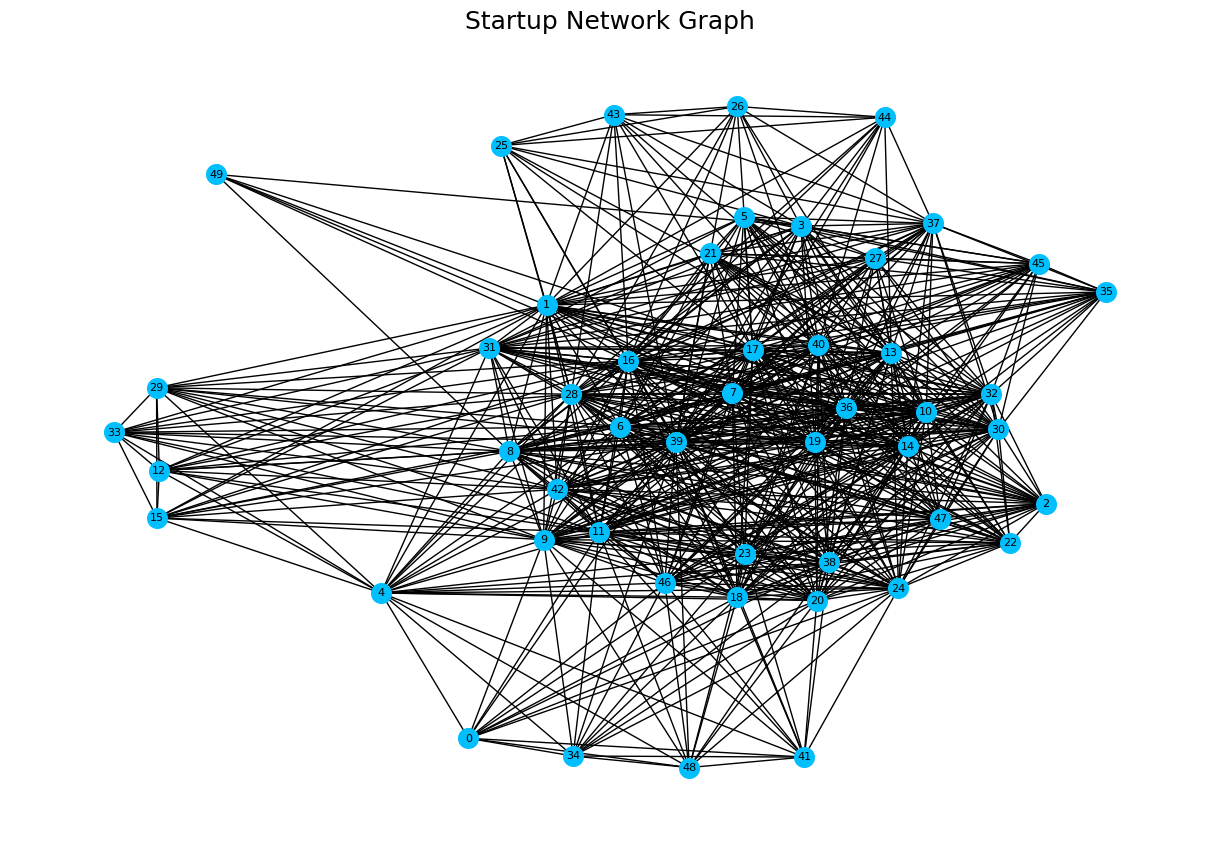

In [16]:
# Plot the graph with improved layout and visibility

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(startup_graph, seed=42)
nx.draw(startup_graph, pos, with_labels=False, node_size=200, node_color="deepskyblue")
node_labels = {n: i for i, n in enumerate(startup_graph.nodes())}
nx.draw_networkx_labels(startup_graph, pos, labels=node_labels, font_size=8, font_color="black")
plt.title("Startup Network Graph", fontsize=18)
plt.show()


### **Key Observations:**
Central Nodes: Nodes that are centrally located and have a high number of connections can be identified as key players or hubs in the network. For instance, nodes 2, 4, 6, 7, and 8 seem to have numerous connections.

Clustered Structure: The graph shows a densely connected core with several nodes having multiple connections, indicating a strong clustering effect. This suggests that many startups are interconnected, possibly through shared investors or similar funding rounds.

Peripheral Nodes: Some nodes, such as 26, 30, 34, and 50, are more peripheral and have fewer connections. These might represent startups with fewer funding rounds or less integration into the central network.

Edge Density: The graph has a high density of edges, especially in the core region, indicating strong connectivity within this group of startups.

### **Potential Insights**:

*Influential Startups*: The central nodes are likely to be influential startups within the network. They might have received more significant investment or have more extensive collaborations.

*Investment Patterns*: The dense core might represent a closely-knit group of startups that share common investors or have similar funding sources.

*Opportunities for New Connections*: Peripheral nodes might have opportunities to increase their connectivity by forming new partnerships or seeking investments from the more central, influential startups.

*Community Detection*: The graph structure suggests the potential for identifying communities within the network. Clusters of tightly connected nodes might indicate groups of startups working in similar domains or sharing common goals.*

In [18]:
# Рассчет степени центральности (Узнаем меру важности узла в графе)
degree_centrality = nx.degree_centrality(startup_graph)
degree_top = pd.DataFrame({
    'name': list(degree_centrality.keys()),
    'degree_centrality': list(degree_centrality.values())
}).nlargest(10, 'degree_centrality')

degree_top

,name,degree_centrality
39,Peer39,0.979592
16,QSecure,0.918367
6,RingCube Technologies,0.816327
17,MeeVee,0.816327
13,drop.io,0.795918
28,"RetailMeNot, Inc.",0.795918
40,Vitrue,0.795918
9,Doostang,0.755102
11,Center'd,0.755102
1,TriCipher,0.734694


**Table Analysis**

Peer39 has the highest degree centrality (0.979592), which means it is connected to almost all other nodes in the graph.

Degree centrality provides insight into which nodes (startups) play key roles in the network by having a higher number of direct connections to other nodes. In the context of startups, this may mean that these startups share investors with a larger number of other startups, making them central figures in the network.

In [20]:
# Рассчет центральности посредничества
betweenness_centrality = nx.betweenness_centrality(startup_graph)
betweenness_top = pd.DataFrame({
    'name': list(betweenness_centrality.keys()),
    'betweenness_centrality': list(betweenness_centrality.values()) #
}).nlargest(10, 'betweenness_centrality')

betweenness_top

,name,betweenness_centrality
39,Peer39,0.086142
16,QSecure,0.044739
1,TriCipher,0.028703
28,"RetailMeNot, Inc.",0.025849
17,MeeVee,0.025765
9,Doostang,0.020590
11,Center'd,0.020590
6,RingCube Technologies,0.019772
13,drop.io,0.019059
40,Vitrue,0.019059


**Table Analysis**

Peer39 has the highest betweenness centrality (0.086142), indicating it frequently acts as a bridge along the shortest paths between other nodes in the network. This suggests Peer39 plays a crucial role in facilitating connections and communication within the network.

Betweenness centrality provides insights into the nodes that have significant influence over the flow of information across the network. Nodes with high betweenness centrality can control communication between other nodes, making them critical points in the network structure. In the context of startups, these nodes may represent companies that connect various clusters of startups, facilitating interactions and information flow within the network.

****

In [24]:
# Рассчет близости центральности
closeness_centrality = nx.closeness_centrality(startup_graph)
closeness_top = pd.DataFrame({
    'name': list(closeness_centrality.keys()),
    'closeness_centrality': list(closeness_centrality.values())
}).nlargest(10, 'closeness_centrality')

closeness_top

,name,closeness_centrality
39,Peer39,0.980000
16,QSecure,0.924528
6,RingCube Technologies,0.844828
17,MeeVee,0.844828
13,drop.io,0.830508
28,"RetailMeNot, Inc.",0.830508
40,Vitrue,0.830508
9,Doostang,0.803279
11,Center'd,0.803279
1,TriCipher,0.790323


**Table Analysis**

Peer39: With a closeness centrality of 0.980000, this indicates that Peer39 is extremely close to all other startups in the network. This suggests that Peer39 can efficiently interact with most other startups, enjoying quick access to information, resources, and collaboration opportunities within the startup ecosystem.

In the context of startups, high closeness centrality signifies that a startup is closely connected to all other startups in the network. This means that the startup has efficient access and can quickly interact with the entire network of startups.

In [25]:
# Рассчет центральности на основе собственного вектора
eigenvector_centrality = nx.eigenvector_centrality(startup_graph)
eigenvector_top = pd.DataFrame({
    'name': list(eigenvector_centrality.keys()),
    'eigenvector_centrality': list(eigenvector_centrality.values())
}).nlargest(10, 'eigenvector_centrality')

eigenvector_top

,name,eigenvector_centrality
39,Peer39,0.205151
16,QSecure,0.199111
6,RingCube Technologies,0.191156
17,MeeVee,0.187576
13,drop.io,0.186545
40,Vitrue,0.186545
28,"RetailMeNot, Inc.",0.180919
7,ClairMail,0.180652
19,Bling Nation,0.179621
30,Airship Ventures,0.179621


**Table Analysis**

This measure evaluates the importance of a startup in the network, taking into account the importance of its neighbors.

With an eigenvector centrality of 0.205151, Peer39 is identified as the most influential startup in the network, with strong connections to other highly influential startups.

In [26]:
!pip install community


^C


In [30]:
from community import community_louvain
partition = community_louvain.best_partition(G)

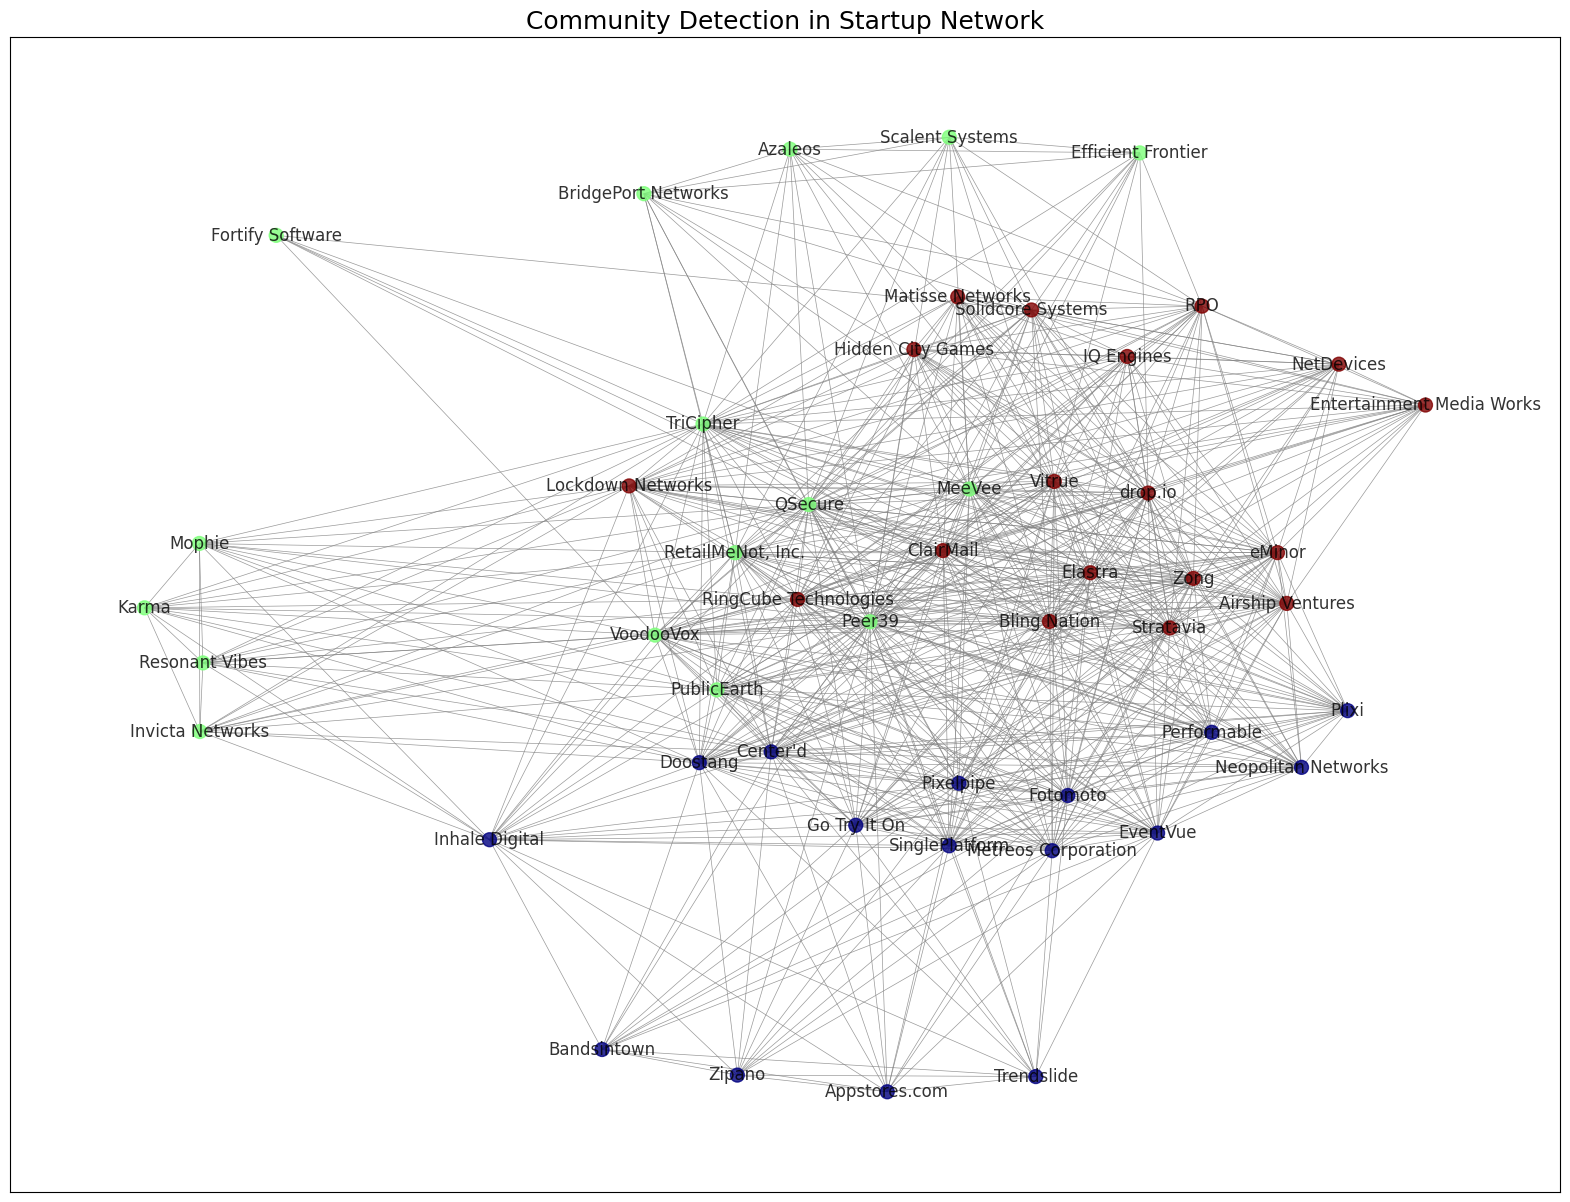

In [31]:
pos = nx.spring_layout(startup_graph, seed=42)  # Используем spring layout для наглядности
plt.figure(figsize=(20, 15))
colors = [partition[node] for node in startup_graph.nodes()]
nx.draw_networkx(startup_graph, pos, node_color=colors, with_labels=True, node_size=100, cmap=plt.cm.jet, alpha=0.8, edge_color='gray', width=0.5)
plt.title("Community Detection in Startup Network", fontsize=18)
plt.show()

The Louvain algorithm is used to maximize modularity, which allows us to determine which nodes in the graph are more strongly connected to each other within communities, and which nodes are less connected to each other. As a result, nodes that are more strongly connected to each other will belong to the same community.

Цветовая кодировка сообществ: Узлы (стартапы) окрашены в разные цвета в зависимости от их принадлежности к различным сообществам. Каждое сообщество представляет группу стартапов, которые имеют более тесные связи друг с другом по сравнению с остальными узлами сети.

Группировка узлов: Видно, что узлы внутри одного сообщества сгруппированы плотнее. Это означает, что стартапы внутри каждого сообщества имеют больше общих связей, чем с узлами других сообществ.

Центральные узлы: Некоторые узлы находятся в центральной позиции и соединены с множеством других узлов, что указывает на их важную роль в сети. Эти узлы могут являться ключевыми игроками в своих сообществах.

Периферийные узлы: Узлы, которые находятся на периферии сети, имеют меньше связей и могут быть менее интегрированы в основную сеть стартапов.

Разные размеры сообществ: Видно, что размеры сообществ варьируются. Некоторые сообщества более крупные и содержат больше стартапов, тогда как другие — меньшие и включают только несколько узлов.



In [36]:
community_df = pd.DataFrame.from_dict(partition, orient='index', columns=['community'])
community_df = community_df.reset_index().rename(columns={'index': 'name'})
community_df = community_df.merge(df[['name', 'id', 'city']], on='name')

# Вывод информации о сообществе
community_info = community_df.groupby('community').agg({
    'name': 'count',
    'city': lambda x: x.mode()[0]  # Вывод наиболее часто встречающегося города в сообществе
}).rename(columns={'name': 'num_startups', 'city': 'most_common_city'})

community_info

KeyError: "['city'] not in index"